In [14]:
import pandas as pd

print("Pandas library imported.")

# Loading the credit card data into the 'card_data' dataframe.
card_data = pd.read_csv('creditcard.csv')
print("Dataset loaded successfully.")

# Getting a quick summary of the data (like checking for nulls).
print("\nData Info:")
card_data.info()

# Taking a look at the first few rows.
print("\nFirst 5 rows of the data:")
display(card_data.head())

Pandas library imported.
Dataset loaded successfully.

Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-n

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Plotting and scaling libraries imported.

Transaction breakdown (Normal vs. Fraud):
Class
0    284315
1       492
Name: count, dtype: int64

Visualizing the Class Imbalance:


C:\Users\shari\AppData\Local\Temp\ipykernel_25124\2594180511.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class', data=card_data, palette='viridis')


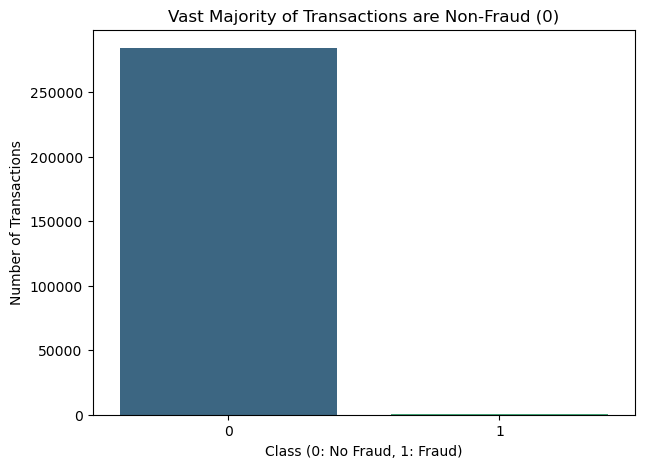


Data has been prepped.


In [15]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler

print("Plotting and scaling libraries imported.")

# Checking the class balance.
print("\nTransaction breakdown (Normal vs. Fraud):")
print(card_data['Class'].value_counts())

# A bar chart to visualize the imbalance with clear labels.
print("\nVisualizing the Class Imbalance:")
plt.figure(figsize=(7, 5))
sns.countplot(x='Class', data=card_data, palette='viridis')
plt.title('Vast Majority of Transactions are Non-Fraud (0)')
plt.xlabel("Class (0: No Fraud, 1: Fraud)") # Adding X-axis label
plt.ylabel("Number of Transactions") # Adding Y-axis label
plt.show()


# --- Data Preparation ---
# Now, let's get the data ready for the model.
scaler = StandardScaler()
card_data['scaled_amount'] = scaler.fit_transform(card_data['Amount'].values.reshape(-1, 1))
card_data['scaled_time'] = scaler.fit_transform(card_data['Time'].values.reshape(-1, 1))

# Dropping the original columns.
card_data.drop(['Time', 'Amount'], axis=1, inplace=True)

print("\nData has been prepped.")

In [16]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

print("Libraries for splitting and balancing data imported.")

# 'X' contains all the features, 'y' contains the target (Class).
X = card_data.drop('Class', axis=1)
y = card_data['Class']

# Splitting data: 80% for training, 20% for testing.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
print("Data split into training and testing sets.")

# Using SMOTE to create synthetic fraud samples in the training data.
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

print("Training data has been balanced using SMOTE.")

Libraries for splitting and balancing data imported.
Data split into training and testing sets.
Training data has been balanced using SMOTE.


XGBoost and model evaluation libraries imported.

Training the fraud detector model...


C:\Users\shari\AppData\Roaming\Python\Python313\site-packages\xgboost\training.py:183: UserWarning: [23:26:28] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Training complete!

--- Model Evaluation Report ---
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.73      0.89      0.80        98

    accuracy                           1.00     56962
   macro avg       0.87      0.94      0.90     56962
weighted avg       1.00      1.00      1.00     56962


Confusion Matrix:


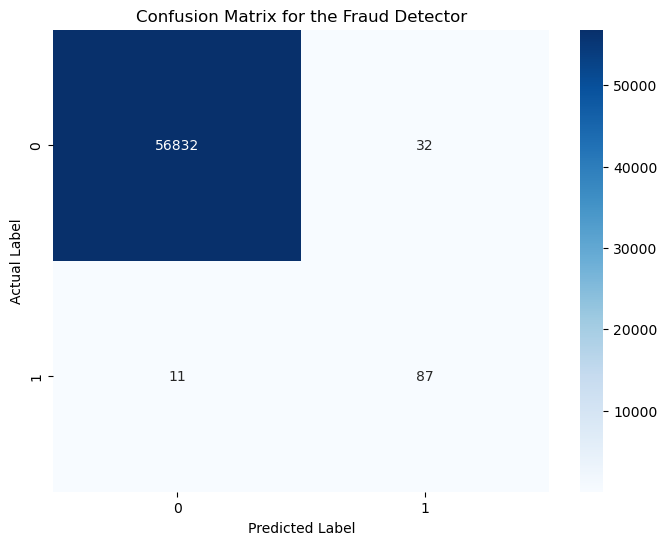

In [17]:
import xgboost as xgb
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

print("XGBoost and model evaluation libraries imported.")

# Initializing the XGBoost model.
fraud_detector = xgb.XGBClassifier(objective='binary:logistic', eval_metric='logloss', use_label_encoder=False)

# Training the model.
print("\nTraining the fraud detector model...")
fraud_detector.fit(X_train_resampled, y_train_resampled)
print("Training complete!")

# Making predictions.
predictions = fraud_detector.predict(X_test)

# Printing the evaluation report.
print("\n--- Model Evaluation Report ---")
print(classification_report(y_test, predictions))

# Visualizing the confusion matrix with clear labels.
print("\nConfusion Matrix:")
conf_matrix = confusion_matrix(y_test, predictions)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix for the Fraud Detector')
plt.ylabel('Actual Label') # Updating Y-axis label
plt.xlabel('Predicted Label') # Updating X-axis label
plt.show()

SHAP and NumPy libraries imported.

Calculating SHAP values...
SHAP values are ready!

Plot 1: Top features the model uses.


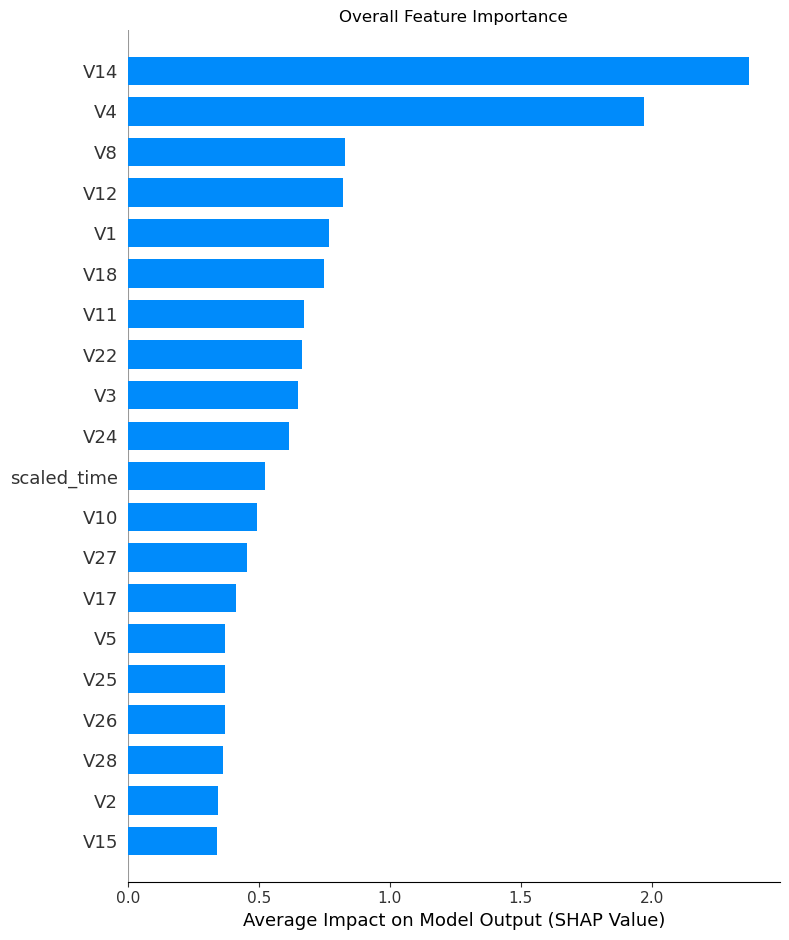


Plot 2: How feature values affect the prediction.


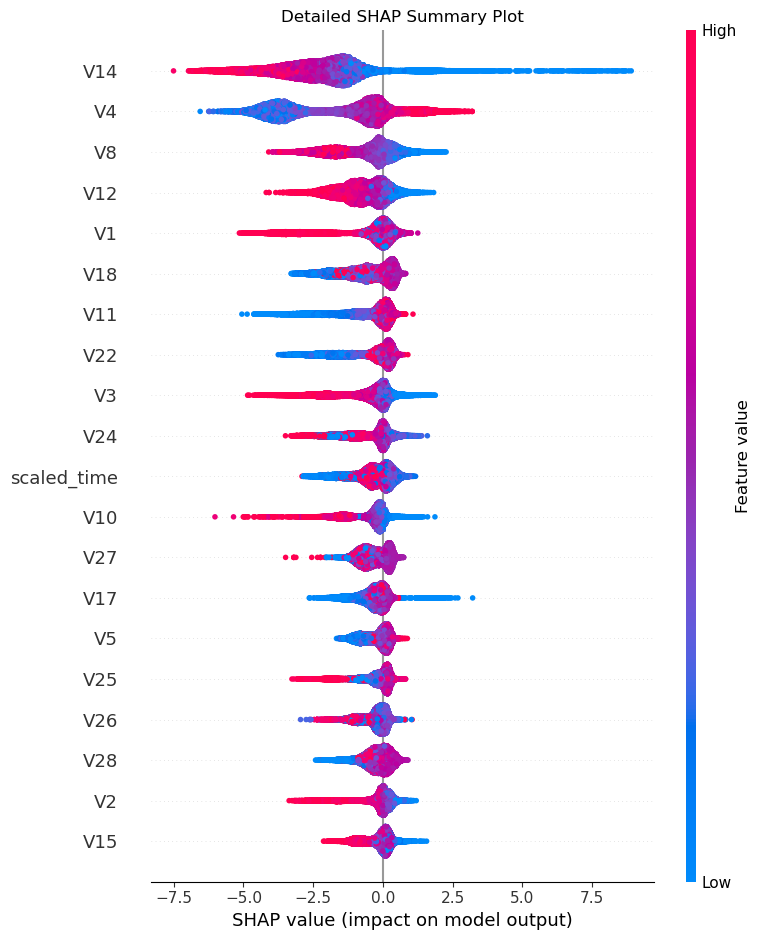


Plot 3: Why a specific transaction was flagged as fraud.


Displaying analysis for transaction index: 840


In [18]:
import shap
import numpy as np
import matplotlib.pyplot as plt

print("SHAP and NumPy libraries imported.")

# --- Explaining the model with SHAP ---
print("\nCalculating SHAP values...")
explainer = shap.TreeExplainer(fraud_detector)
shap_values = explainer.shap_values(X_test)
print("SHAP values are ready!")

# --- Plot 1: Overall Feature Importance ---
print("\nPlot 1: Top features the model uses.")
plt.figure(figsize=(10, 6))
shap.summary_plot(shap_values, X_test, plot_type="bar", show=False)
plt.title("Overall Feature Importance")
plt.xlabel("Average Impact on Model Output (SHAP Value)") # Adding a more descriptive X-axis label
plt.tight_layout()
plt.show()

# --- Plot 2: Detailed Feature Impact ---
print("\nPlot 2: How feature values affect the prediction.")
# SHAP's summary plot labels its own axes, but we'll add a title.
plt.title("Detailed SHAP Summary Plot")
shap.summary_plot(shap_values, X_test, show=False)
plt.tight_layout()
plt.show()

# --- Plot 3: Analyzing a Single Fraud Case ---
print("\nPlot 3: Why a specific transaction was flagged as fraud.")
shap.initjs() # This is needed for the force plot to render

# A check to prevent errors if no fraud is found in the test set
fraud_indices = np.where(y_test == 1)[0]
if len(fraud_indices) > 0:
    first_fraud_index = fraud_indices[0]
    print(f"Displaying analysis for transaction index: {first_fraud_index}")
    display(shap.force_plot(explainer.expected_value, shap_values[first_fraud_index,:], X_test.iloc[first_fraud_index,:]))
else:
    print("No fraud cases found in the test set to analyze.")